# 抽出された特徴量の評価

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import glob
dat = json.load(open("figure_features.json"))
dirname = glob.glob('jsons/*/*')


In [4]:
for shape, d in zip(dat, dirname):
    shape = np.array(shape)
    print d, "\t", shape.mean(0)


jsons/clutter/JPN 	[  4.24942611e-01   4.81671302e-02   1.47076185e-02   7.30218945e-03
   3.24922395e-03   2.22611217e-03   9.72160527e-04   2.49084474e-04
   5.47659072e-04   4.64563009e-01   6.36381245e-02   1.37514655e-02
   7.39218124e-03   5.64463882e-03   3.10603938e-03   2.20012073e-03
   1.18025662e-03   7.36676336e-04]
jsons/clutter/WRD 	[  4.20551174e-01   4.54176527e-02   8.16862810e-03   3.22790661e-03
   2.00016428e-03   2.05458639e-03   1.03592199e-03   5.47024962e-04
   2.66085895e-04   4.98507622e-01   6.58874983e-02   8.74700154e-03
   3.94466648e-03   4.46006316e-03   2.72679839e-03   1.33838888e-03
   1.03319384e-03   4.82477167e-04]
jsons/gochagocha/JPN 	[ 0.48080284  0.04337108  0.01009146  0.00567303  0.00380735  0.00283242
  0.00228008  0.00140847  0.00106967  0.44270391  0.04899856  0.01273228
  0.00720687  0.00527838  0.00443667  0.0039139   0.00312414  0.00276968]


In [5]:
feat = np.array([np.array(d).mean(0) for d in dat])

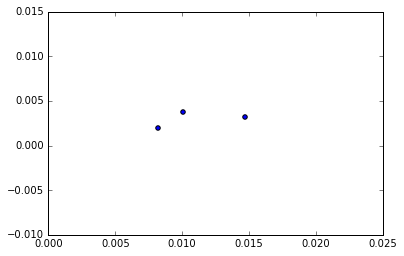

In [6]:
plt.scatter(feat.T[2], feat.T[4])

In [118]:
deg10 = 0.1745

def gen_p_kado():
    return np.pi / 2 + np.random.random() * np.pi / 2

def gen_n_kado():
    return - gen_p_kado()

def gen_p_maru():
    return deg10 + np.random.random() * (np.pi/2 - deg10)

def gen_n_maru():
    return - gen_p_maru()

def gen_massugu():
    return - deg10 + np.random.random() * deg10 * 2

gen_functions = [
    gen_p_kado,
    gen_n_kado,
    gen_p_maru,
    gen_n_maru,
    gen_massugu
    ]


def plot_randomwalk(feat):
    angle = []
    for i in range(100):
        idx = np.argmax(np.random.multinomial(1, feat))
        angle.append( gen_functions[idx]() )
    angle = np.array(angle)
    
    point = np.zeros(2)
    path = [point.copy()]
    edge_len = 10
    direction = 0
    
    for a in angle:
        dp = np.array([np.cos(direction), np.sin(direction)]) * edge_len
        point += dp
        path.append(point.copy())
        direction += a

    path = np.vstack(path)
    
    plt.plot(*path.T)

In [123]:
for f, d in zip(feat, dirname):
    plot_randomwalk(f)
    plt.savefig("random_walk_images/%s.png" % d.replace('/', '_'))
    plt.clf()
